# Setup Env for Stable Diffusion

## Windows 10/11

### Step 1. Download and install NVIDIA CUDA, download installation file from: 

https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html  

### Step 2. Install Python

Install Python using Chocolatey:
```powershell
choco install python --version=3.10.6
```

Install Python using winget:
```powershell
winget install -e --id Python.Python.3.10
```

### Step 3. Create a Python Virtual Environment:

```powershell
pip install --upgrade --user pip
pip install virtualenv
python -m virtualenv venv_win_p310
venv_win_p310\Scripts\activate
python -m ensurepip
python -m pip install --upgrade pip
```

### Step 4. Install PyTorch  
```powershell
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
```

### Step 5. Install packages for Hugging Face diffusers

```powershell
pip install diffusers
pip install transformers scipy ftfy accelerate
```

## Linux (Ubuntu)

### Step 1. Remove pre-installed Nvidia driver
If you have Nvidia’s driver already installed, it is better to uninstall all Nvidia drivers first to ensure minimum errors. Skip the nvidia driver purge if you have the CUDA in running.

```sh
sudo apt-get purge nvidia*
sudo apt-get autoremove
```

Reboot system

```sh
sudo reboot
```

### Step 2. Install GCC 
```sh
sudo apt install gcc
```

### Step 3. Install CUDA
Choose the right version based on your select from page: https://developer.nvidia.com/cuda-downloads. Here is a sample installation script for Ubuntu 22.04 x86_64 version. 

```
wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-ubuntu2204.pin
sudo mv cuda-ubuntu2204.pin /etc/apt/preferences.d/cuda-repository-pin-600
wget https://developer.download.nvidia.com/compute/cuda/12.1.1/local_installers/cuda-repo-ubuntu2204-12-1-local_12.1.1-530.30.02-1_amd64.deb
sudo dpkg -i cuda-repo-ubuntu2204-12-1-local_12.1.1-530.30.02-1_amd64.deb
sudo cp /var/cuda-repo-ubuntu2204-12-1-local/cuda-*-keyring.gpg /usr/share/keyrings/
sudo apt-get update
sudo apt-get -y install cuda
```

### Step 4. Install Python

Installing Python and tools
```sh
sudo apt-get install software-properties-common
sudo add-apt-repository ppa:deadsnakes/ppa
sudo apt-get update
sudo apt-get install python3.10
sudo apt-get install python3.10-dev
sudo apt-get install python3.10-distutils
```

Install PIP

```sh
curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
python3.10 get-pip.py
```

Create a Python virtual environment

```sh
python3.10 -m pip install --user virtualenv
python3.10 -m virtualenv venv_ubuntu_p310
. venv_ubuntu_p310/bin/activate
```

### Step 5. Install PyTorch

```sh
pip3 install torch torchvision torchaudio
```

### Step 6. Install packages for Hugging Face diffusers

```sh
pip install transformers scipy ftfy accelerate ipywidgets
pip install diffusers
```

## Run a Stable Diffusion Pipeline

In [1]:
# start pipeline
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
    , torch_dtype=torch.float16
).to("cuda:0")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

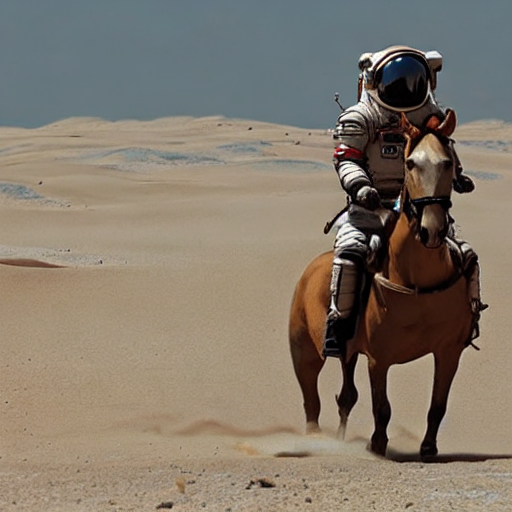

In [2]:
# Generate an image
prompt = "a photo of an astronaut riding a horse on mars,blazing fast, wind and sand moving back"
image = pipe(
    prompt, num_inference_steps=30
).images[0]
image